In [9]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
data_x = [random.uniform(1,20)for i in range(0,100)]

In [11]:
data_y = [random.uniform(1,20)for i in range(0,100)]

In [12]:
data = [] 
for i in range(0,len(data_x)): 
    data.append([data_x[i],data_y[i]])

In [13]:
def ecludian_disctance(value_left,value_right):
    '''
    This function is for count ecludian distance
    
    args:
        value_left (list): array with value x,y
        value_right (list): array with value x,y
    return:
        float : distance between them
    '''
    diff_x = abs(value_left[0] - value_right[0])
    diff_y = abs(value_left[1] - value_right[1])
    return math.sqrt(math.pow(diff_x,2) + math.pow(diff_y,2))

def k_means(k=None , random_seed = 42, data=None):
    '''
    This function is used for get the kmeans group
    
    Args:
        K (int): number of cluster
        random_seed (int): random number for pick center
        data (list): list of data that want to cluster
    '''
    pick_center = []
    pick_center_index = []
    result = {}
    for i in range(0,k):
        random.seed(random_seed + i*10)
        random_index = random.randint(0,len(data))
        pick_center_index.append(random_index)
        pick_center.append(data[random_index])
        result[i] = [data[random_index]]
    
    for i in range(0,len(data)):
        if i in pick_center_index:
            continue
        min_distances_k = 0
        min_distance = 0
        for j in range(0, k):
            distance = ecludian_disctance(pick_center[j],data[i])
            if min_distance ==0 or min_distance > distance:
                min_distance = distance
                min_distances_k = j
        result[min_distances_k].append(data[i])            
    return result

def min_max_values(values):
    '''
    This function is used to get the min max value for data with 2 dimentional_array
    
    Args:
        values (list) : 2 dimentional arrays with value[[x,y]]
    
    Returns :
        float : min x
        float : max x 
        float : min y
        float : max y
    '''
    
    min_x =0
    min_y =0
    max_x =0
    max_y =0
    
    for value in values:
        if min_x ==0 :
            min_x = value[0]
            max_x = value[0]
            min_y = value[1]
            max_y = value[1]
            continue
        min_x = min(min_x,value[0])
        min_y = min(min_y,value[1])
        max_x = max(max_x,value[0])
        max_y = max(max_y,value[1])
    return min_x,max_x, min_y,max_y

def get_centroid(values):
    '''
    this function is used for get centroid from dictionary result
    
    Args:
        values (dict): key was the cluster and value are arrays
    
    return
        list : list of centroid each cluster
    '''
    result = []
    for key,value in values.items():
        min_x,max_x,min_y,max_y = min_max_values(value)
        x = (min_x + max_x)/2
        y = (min_y + max_y)/2
        xy = [x,y]
        min_distance = 0
        min_distance_index = 0
        for i, val in enumerate(value):
            distance = ecludian_disctance(xy,val)
            if min_distance ==0 or min_distance > distance:
                min_distance = distance
                min_distance_index = i
        result.append(value[min_distance_index])
    
    return result
            
        

In [14]:
result = k_means(3,42,data)

In [15]:
get_centroid(result)

[[5.7357410015985755, 14.019499318420237],
 [16.641576491558187, 15.86917153239798],
 [10.855809549684466, 7.459184735012464]]

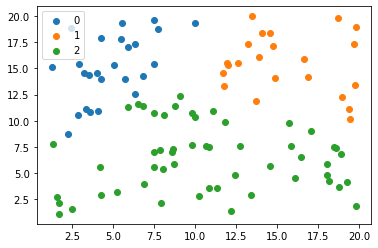

In [16]:
for key,value in result.items():
    x = [x[0] for x in value]
    y = [x[1] for x in value]
    plt.scatter(x,y, label=key)
plt.legend()